# Write a Python Program for High boost filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
!wget -q -O lena_colored.png "https://drive.google.com/uc?export=download&id=1SQXXo6c1DSpWi-Gy95QNiNAx4E-bvJnf"

--2024-04-30 01:05:58--  https://drive.google.com/uc?export=download&id=1SQXXo6c1DSpWi-Gy95QNiNAx4E-bvJnf
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving drive.google.com (drive.google.com)... 142.250.182.238, 2404:6800:4009:81f::200e
Connecting to drive.google.com (drive.google.com)|142.250.182.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SQXXo6c1DSpWi-Gy95QNiNAx4E-bvJnf&export=download [following]
--2024-04-30 01:05:58--  https://drive.usercontent.google.com/download?id=1SQXXo6c1DSpWi-Gy95QNiNAx4E-bvJnf&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.27.193, 2404:6800:4009:800::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.27.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433235 (423K) [image/png]
Saving to: ‘lena_colored.png’

lena_colored.png    100%[=

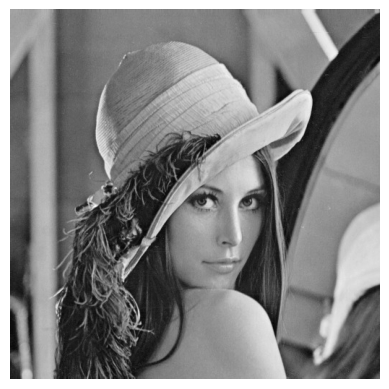

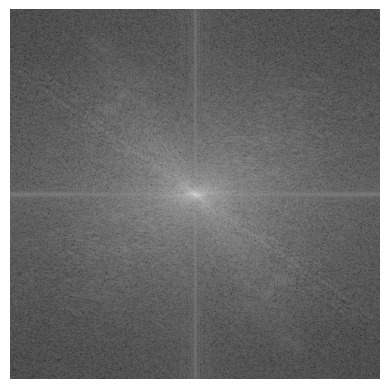

In [3]:
# input image f(x,y)
f = cv2.imread('lena_colored.png', 0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

# input image in frequency domain, F(u,v)
F = np.fft.fftshift(np.fft.fft2(f))

plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

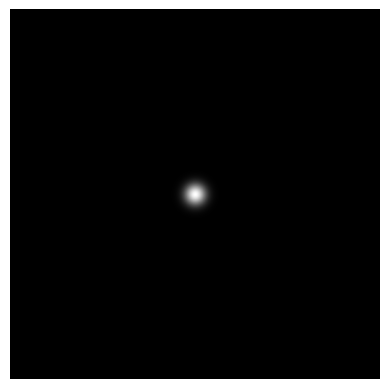

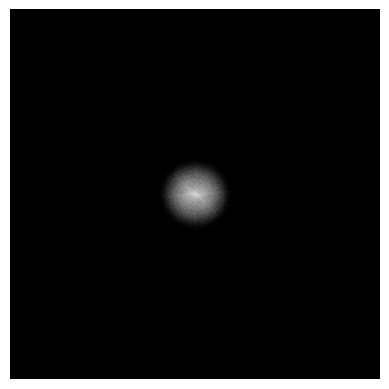

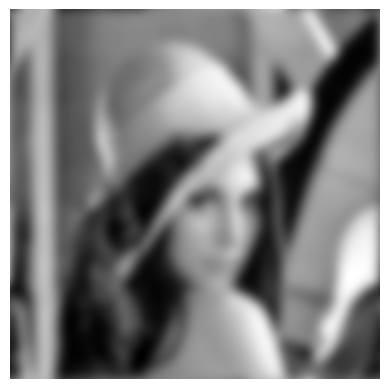

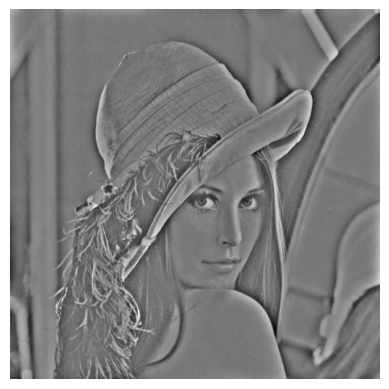

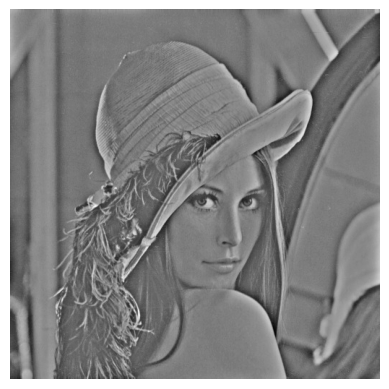

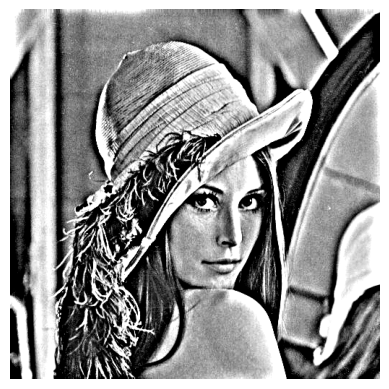

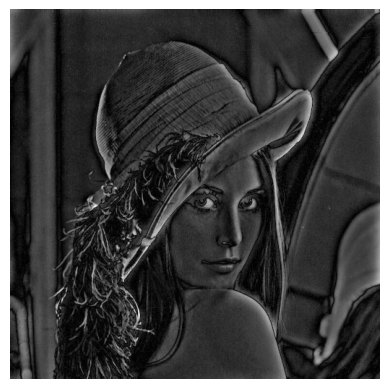

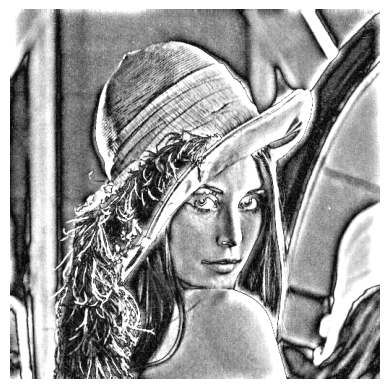

In [4]:
# Gaussian Low Pass Filter
M,N = F.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# create fLP(x,y) (smoothed image)
FLP = H * F
plt.imshow(np.log1p(np.abs(FLP)), cmap='gray')
plt.axis('off')
plt.show()
FLP = np.fft.ifftshift(FLP)
fLP = np.abs(np.fft.ifft2(FLP))

plt.imshow(fLP, cmap='gray')
plt.axis('off')
plt.show()

# create mask g(x,y)
gMask = f - fLP

plt.imshow(gMask, cmap='gray')
plt.axis('off')
plt.show()

# unsharp masking
k = 5
g = f + k*gMask

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

g = np.clip(g, 0, 255)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

# Unsharp Masking in Frequency Domain
G = (1 + k*(1-H))*F
g = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

g = np.clip(g, 0, 255)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()